In [37]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns  # For data visualization
import seaborn as sn   # For plotting graphs
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [38]:
#Loading the data
train=pd.read_csv("trainfinal.csv")
test=pd.read_csv("testfinal.csv")

Checking features present in our data.

In [10]:
train.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')

In [11]:
test.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome'],
      dtype='object')

It can be infered that subscribed is the target variable as it is not present in the test dataset.

Checking the shape of the dataset.

In [8]:
train.shape, test.shape

((31647, 18), (13564, 17))

We have 17 independent variables and 1 target variable, i.e. subscribed in the train dataset. We have similar features in the test dataset as the train dataset except the subscribed. We will predict the subscribed with the help of model built using the train data.

Let's look at how many categorical and numerical (continuous) variables are there in our dataset. We will look at their data types.

In [12]:
train.dtypes

ID             int64
age            int64
job           object
marital       object
education     object
default       object
balance        int64
housing       object
loan          object
contact       object
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome      object
subscribed    object
dtype: object

We can see there are two format of data types:

object: Object format means variables are categorical. Categorical variables in our dataset are: job, marital, education, default, housing, loan, contact, month, poutcome, subscribed

int64: It represents the integer variables. Integer variables in our dataset are: ID, age, balance, day, duration, campaign, pdays, previous

In [13]:
train.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


# Univariate Analysis

The distribution of our target variable, i.e. subscribed. As it is a categorical variable, let's look at its frequency table,percentage distribution and bar plots.

In [14]:
train['subscribed'].value_counts()

no     27932
yes     3715
Name: subscribed, dtype: int64

In [15]:
#Normalize can be set to True to print proportions instead of numbers.
train['subscribed'].value_counts(normalize=True)

no     0.882611
yes    0.117389
Name: subscribed, dtype: float64

<Axes: >

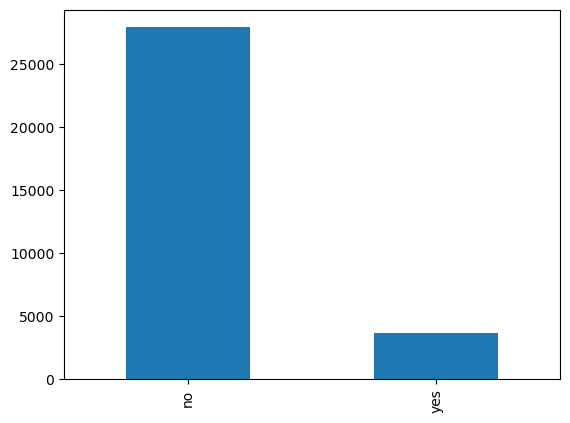

In [16]:
#Plotting the bar of frequencies.
train['subscribed'].value_counts().plot.bar()

So,3715 out of total 31647 have subscribed which is around 12%.Let's now explore the variables to have a better understanding of the dataset.

We will first explore the variables individually using univariate analysis, then we'll look at the relation between various independent and target variable.

We'll also look at the correlation plot to see which variables affect the target variables most.


Let's first look at the distribution of age variable to see how many people belongs to a particular age group.

<Axes: xlabel='age', ylabel='Density'>

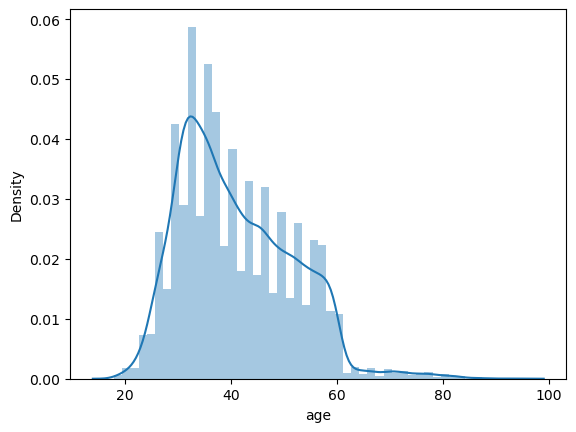

In [17]:
sn.distplot(train['age'])

We can infer that most of the clients fall in the age group between 20-60. Now let's look at what are the different types of jobs of the clients. As job is a categorical variable, we will look at its frequency table.

Text(0.5, 1.0, 'Frequency Table')

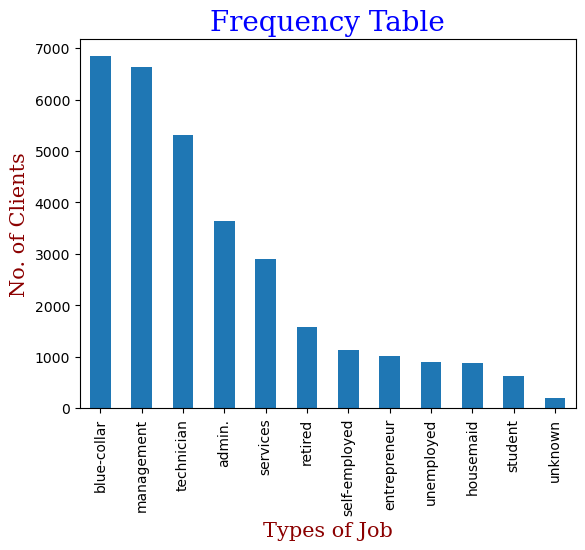

In [52]:
train['job'].value_counts().plot.bar()
font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'darkred','size':15}
plt.xlabel("Types of Job",fontdict=font2)
plt.ylabel("No. of Clients",fontdict=font2)
plt.title("Frequency Table",fontdict=font1)

Most of the client belong to the blue-collar job and students are the least in numbers as they do not generally take term deposits.

Now let's look many clients have default history.

In [54]:
train['default'].value_counts()

no     31062
yes      585
Name: default, dtype: int64

Text(0.5, 1.0, "Defaulter's Frequency Table")

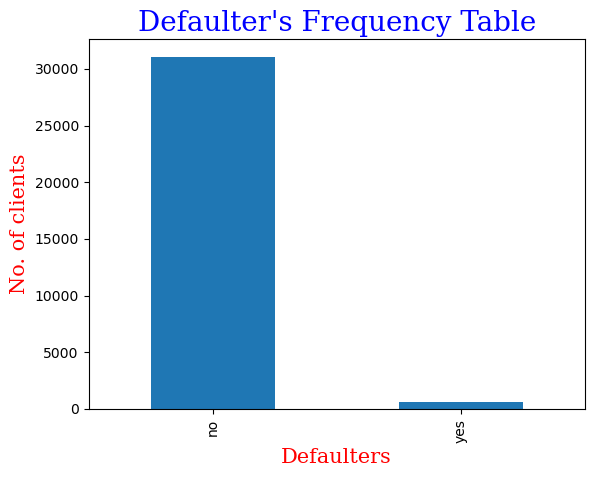

In [74]:
train['default'].value_counts().plot.bar()
font1={'family':'serif','color':'blue','size':20}
font2={'family':'serif','color':'red','size':15}
plt.xlabel("Defaulters",fontdict=font2)
plt.ylabel("No. of clients",fontdict=font2)
plt.title("Defaulter's Frequency Table",fontdict=font1)

More than 90% of the clients have no default history. 

Now we will explore these variables against the target variable using bivariate analysis. We will make use of scatter plots for continuous or numeric variables and crosstabs for the categorical variables. Let's start with job and subscribed variable.

# Bivariate Analysis

subscribed       no  yes
job                     
admin.         3179  452
blue-collar    6353  489
entrepreneur    923   85
housemaid       795   79
management     5716  923
retired        1212  362
self-employed   983  140
services       2649  254
student         453  182
technician     4713  594
unemployed      776  129
unknown         180   26


Text(0.5, 1.0, 'Bar Plot')

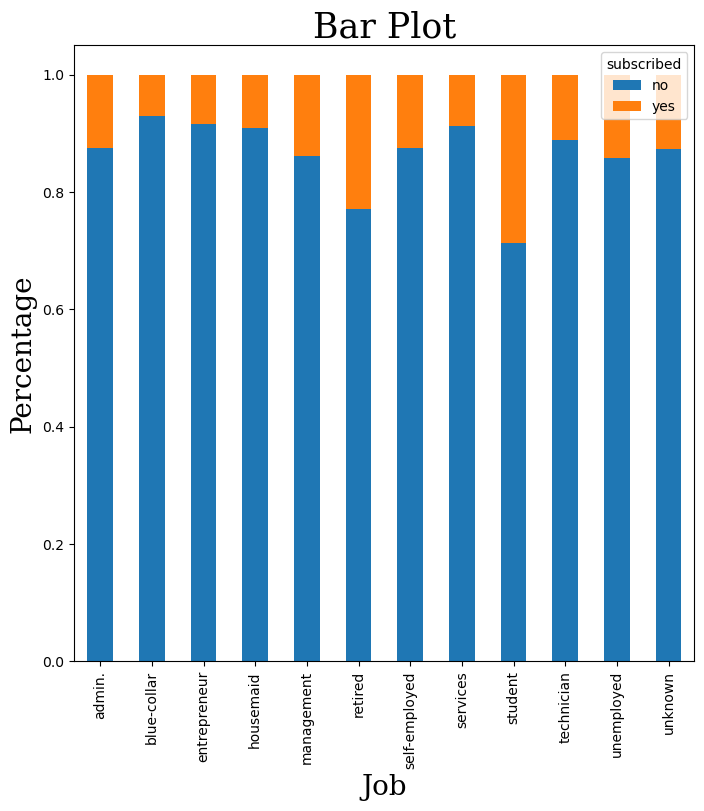

In [18]:
print(pd.crosstab(train['job'],train['subscribed']))
job=pd.crosstab(train['job'],train['subscribed'])
job.div(job.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(8,8))
font1={'family':'serif','size':20}
font2={'family':'serif','size':25}
plt.xlabel('Job',fontdict=font1)
plt.ylabel('Percentage',fontdict=font1)
plt.title("Bar Plot",fontdict=font2)

From the above graph we can infer that students and retired people have higher chances of subscribing to a term deposit, which is surprising as students generally do not subscribe to a term deposit. 

The possible reason is that the number of students in the dataset is less and comparatively to other job types, more students have subscribed to a term deposit.

Next, let's explore the default variable against the subscribed variable.

subscribed      0     1
default                
no          27388  3674
yes           544    41


Text(0.5, 1.0, 'Bar Plot')

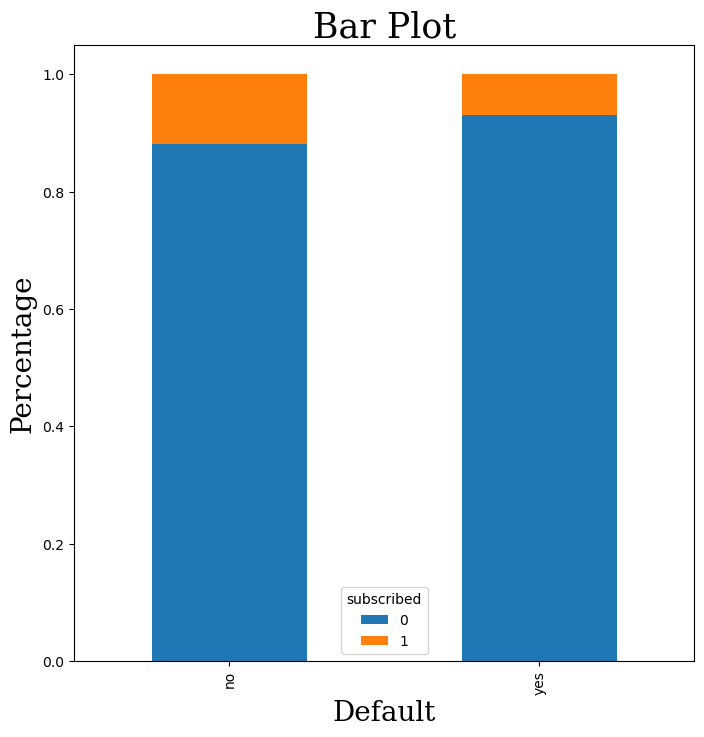

In [23]:
print(pd.crosstab(train['default'],train['subscribed']))
default=pd.crosstab(train['default'],train['subscribed'])
default.div(default.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(8,8))
font1={'family':'serif','size':25,'color':'black'}
font2={'family':'serif','size':20,'color':'black'}
plt.xlabel("Default",fontdict=font2)
plt.ylabel("Percentage",fontdict=font2)
plt.title("Bar Plot",fontdict=font1)

We can infer that clients having no previous default have slightly higher chances of subscribing to a term loan as compared to the clients who have previous default history.

Let's now look at how correlated our numerical variables are. We will see the correlation between each of these variables and the variable which have high negative or positive values are correlated. By this we can get an overview of the variables which might affect our target variable. We will convert our target variable into numeric values first.

In [22]:
train['subscribed'].replace('no',0,inplace=True)
train['subscribed'].replace('yes',1,inplace=True)

<Axes: >

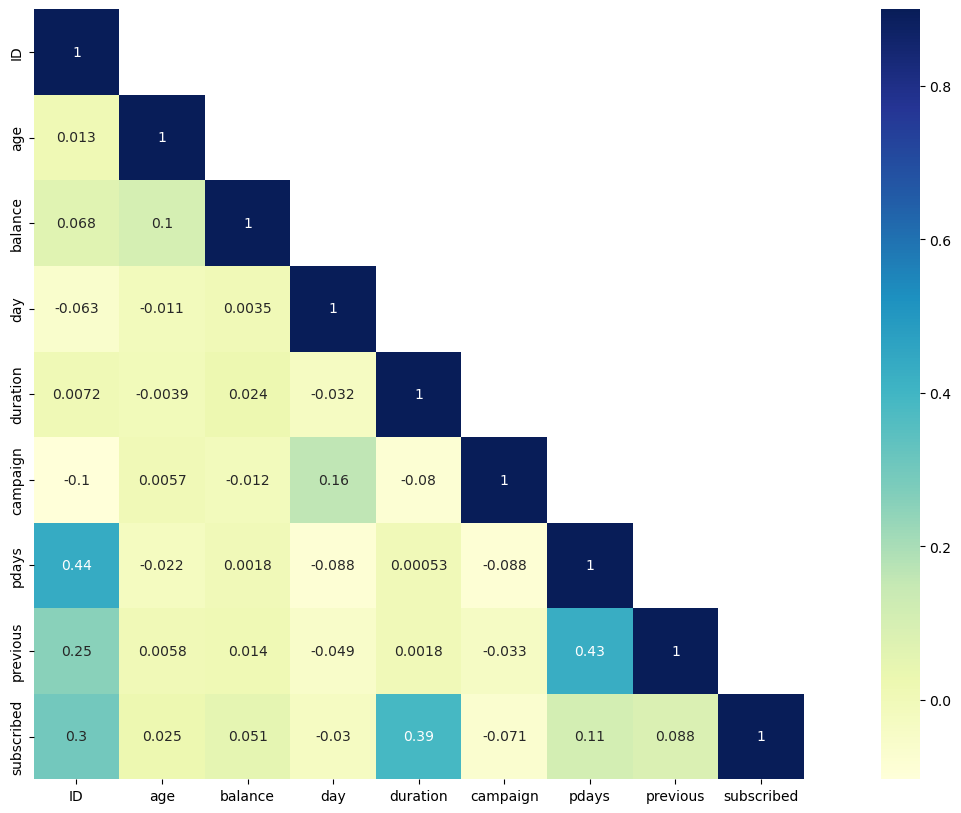

In [25]:
corr=train.corr()
mask=np.array(corr)
mask[np.tril_indices_from(mask)]=False
fig,ax=plt.subplots()
fig.set_size_inches(20,10)
sn.heatmap(corr, mask=mask,vmax=.9, square=True,annot=True, cmap="YlGnBu")

We can infer that duration of the call is highly correlated with the target variable(i.e.subscribed). This can be verified as well. As the duration of the call is more, there are higher chances that the client is showing interest in the term deposit and hence there are higher chances that the client will subscribe to term deposit.

Next we will look for any missing values in the dataset.

In [27]:
train.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

There are no missing values in the train dataset.

Next, we will start to build our predictive model to predict whether a client will subscribe to a term deposit or not.

As the sklearn models takes only numerical input, we will convert the categorical variables into numerical values using dummies. We will remove the ID variables as they are unique values and then apply dummies. We will also remove the target variable and keep it in a separate variable.

# Model Building


In [39]:
target = train['subscribed']
train = train.drop('subscribed',1)


In [40]:
# applying dummies on the train dataset
train = pd.get_dummies(train)

Now it's time to build our model.We will split the train data into training set and validation set so that we are able to validate our model.

We will keep 20% as the validation set and rest as the training set.

In [41]:
from sklearn.model_selection import train_test_split

In [81]:
#splitting into train and validation with 20% data in validation set and 80% data in train set.
X_train,X_val,y_train,y_val=train_test_split(train,target,test_size=0.2,random_state=42)

Now our data is ready. Its time to build our model and check its performance. Logistic regression is used for classification problems and as it is a classification problem let's first build a Logistic Regression model.

# Logisitic Regression

In [82]:
from sklearn.linear_model import LogisticRegression

In [83]:
# defining the logistic regression model
lreg = LogisticRegression()

In [84]:
# fitting the model on  X_train and y_train
lreg.fit(X_train,y_train)

LogisticRegression()

In [85]:
# making prediction on the validation set
prediction = lreg.predict(X_val)

Now we will evaluate how accurate our predictions are. As the evaluation metric for this problem is accuracy, let's calculate the accuracy on validation set.

In [86]:
from sklearn.metrics import accuracy_score

In [87]:
accuracy_score(y_val,prediction)

0.8875197472353871

We got an accuracy score of around 88% on the validation dataset. Logistic regression has a linear decision boundary. What if our data have non linearity? We need a model that can capture this non linearity. 

Let's try decision tree algorithm now to check if we get better accuracy with that. 

# Decision Tree 

In [88]:
from sklearn.tree import DecisionTreeClassifier

In [89]:
# defining the decision tree model with depth of 6, you can tune it further to improve the accuracy score
clf = DecisionTreeClassifier(max_depth=6, random_state=0)

In [90]:
# fitting the decision tree model
clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=6, random_state=0)

In [91]:
# making prediction on the validation set
predict = clf.predict(X_val)

In [92]:
# calculating the accuracy score
accuracy_score(y_val, predict)

0.9041074249605056

We got an accuracy of more than 90% on the validation set.Let's now make the prediction on test dataset. We will make the similar changes in the test set as we have done in the training set before making the predictions.

In [93]:
test = pd.get_dummies(test)

In [94]:
test_prediction = clf.predict(test)

In [95]:
submission_final = pd.DataFrame()

In [96]:
# creating a Business_Sourced column and saving the predictions in it
submission_final['ID'] = test['ID']
submission_final['subscribed'] = test_prediction

Since the target variable is yes or no, we will convert 1 and 0 in the predictions to yes and no respectively.

In [97]:
submission['subscribed'].replace(0,'no',inplace=True)
submission['subscribed'].replace(1,'yes',inplace=True)

In [80]:
submission.to_csv('submission_final.csv', header=True, index=False)